                          Time  Throughput  Lossrate  CC  Score   RTT  Energy  \
0   2023-10-25 16:15:42.342601        0.00       0.0   1   -0.0   0.0     0.0   
1   2023-10-25 16:15:43.341703        0.00       0.0  64   -0.0   0.0     0.0   
2   2023-10-25 16:15:44.342644        0.00       0.0  64   -0.0  32.6     0.0   
3   2023-10-25 16:15:45.343337        0.00       0.0  64   -0.0  33.2     0.0   
4   2023-10-25 16:15:46.344535        0.00       0.0  64   -0.0  32.7     0.0   
..                         ...         ...       ...  ..    ...   ...     ...   
260 2023-10-25 16:20:02.617575        0.32       0.0   9   -0.0  32.6    61.0   
261 2023-10-25 16:20:03.618409        0.32       0.0   9   -0.0  32.6    61.0   
262 2023-10-25 16:20:04.619856        0.32       0.0   9   -0.0  32.6    61.0   
263 2023-10-25 16:20:05.620449        0.32       0.0   9   -0.0  32.7    61.0   
264 2023-10-25 16:20:06.621818        0.32       0.0   9   -0.0  32.7    61.0   

     concurrency  paralleli

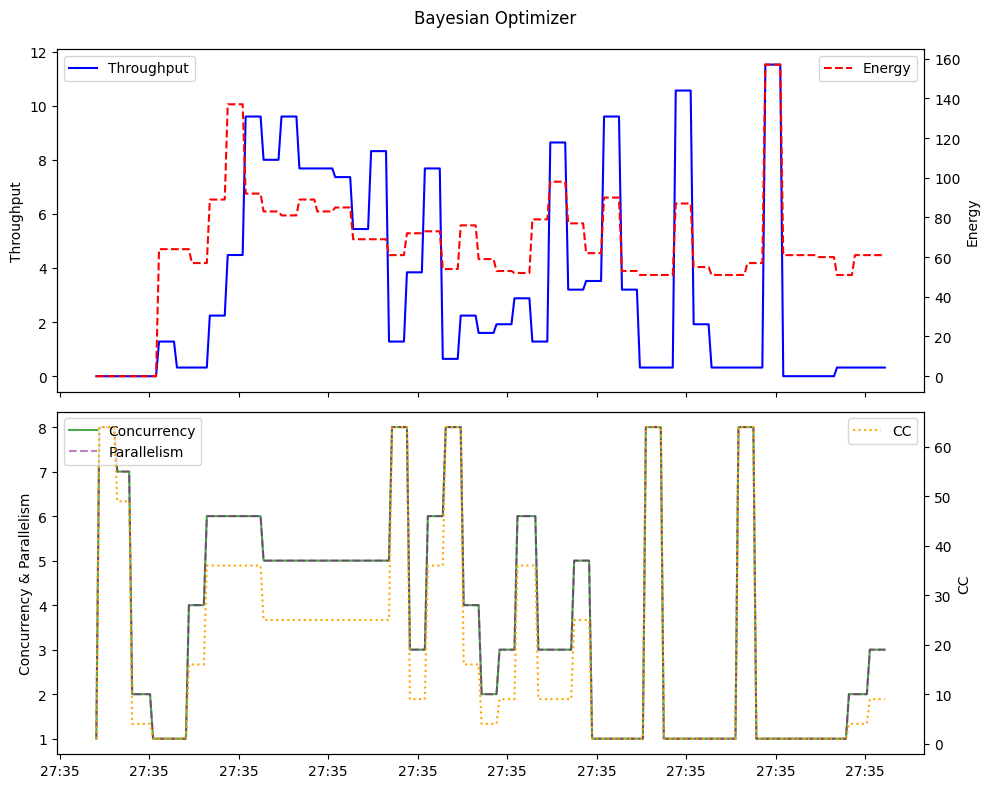

In [2]:
#BO

# Importing necessary libraries
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt


FileName='/home/cc/transferService/final_code_transferService/logFileDir/10_25_2023_16_15_42.log'
# Read the log file
with open(FileName, "r") as f:
    logs = f.readlines()

# Parsing logs and creating a list of dictionaries
data = []

for log in logs:
    match = re.search(r"Throughput @([\d\.]+)s:\s+([\d\.]+)Gbps, lossRate: ([\d\.]+) CC:(\d+)  score:([\d\.-]+)  rtt:([\d\.]+) ms energy:([\d\.]+) Jules", log)
    if match:
        time, throughput, lossRate, cc, score, rtt, energy = match.groups()
        data.append({
            "Time": float(time),
            "Throughput": float(throughput),
            "Lossrate": float(lossRate),
            "CC": int(cc),
            "Score": float(score),
            "RTT": float(rtt),
            "Energy": float(energy)
        })

# Creating a dataframe
df = pd.DataFrame(data)
# df = df[df["Throughput"] != 0]

def map_cc_to_concurrency_parallelism(cc):
    # Using a dictionary to map CC values to concurrency and parallelism
    cc_map = {
        1: (1, 1),
        4: (2, 2),
        9: (3, 3),
        16: (4, 4),
        25: (5, 5),
        36: (6, 6),
        49: (7, 7),
        64: (8, 8)
    }
    return cc_map.get(cc, (0, 0))

df["concurrency"], df["parallelism"] = zip(*df["CC"].apply(map_cc_to_concurrency_parallelism))
# Convert Unix timestamp to datetime
df["Time"] = df["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
print(df)
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# First subplot
ln1 = ax1.plot(df["Time"], df["Throughput"], label="Throughput", color="blue", linestyle="-")
ax1.set_ylabel("Throughput")
ax1_twin = ax1.twinx()
ln2 = ax1_twin.plot(df["Time"], df["Energy"], label="Energy", color="red", linestyle="--")
ax1_twin.set_ylabel("Energy")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Second subplot
ln3 = ax2.plot(df["Time"], df["concurrency"], label="Concurrency", color="green", linestyle="-", alpha=0.7)
ln4 = ax2.plot(df["Time"], df["parallelism"], label="Parallelism", color="purple", linestyle="--", alpha=0.5)
ax2.set_ylabel("Concurrency & Parallelism")
ax2_twin = ax2.twinx()
ln5 = ax2_twin.plot(df["Time"], df["CC"], label="CC", color="orange", linestyle=":")
ax2_twin.set_ylabel("CC")
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Formatting X axis to show only minutes and seconds
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.utcfromtimestamp(x).strftime('%M:%S')))

# Add label "Bayesian Optimizer"
fig.suptitle("Bayesian Optimizer")

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


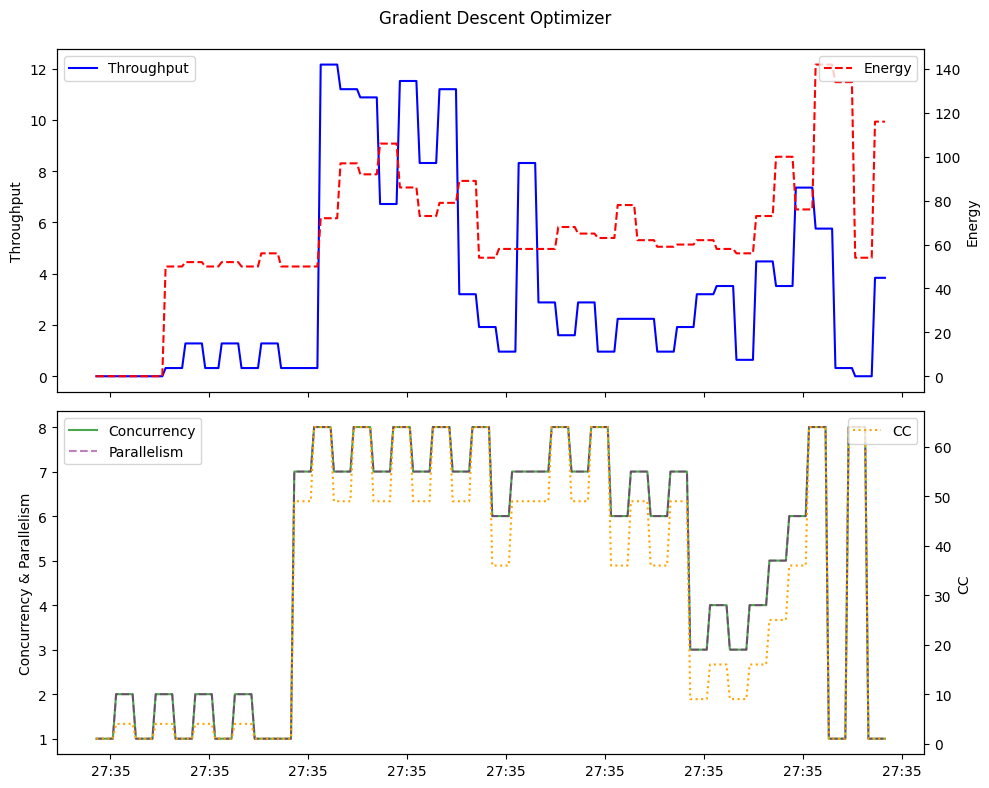

In [16]:
#GD

# Importing necessary libraries
import pandas as pd
import re
import datetime

FileName='/home/cc/transferService/final_code_transferService/logFileDir/10_25_2023_16_21_25.log'
# Read the log file
with open(FileName, "r") as f:
    logs = f.readlines()

# Parsing logs and creating a list of dictionaries
data = []

for log in logs:
    match = re.search(r"Throughput @([\d\.]+)s:\s+([\d\.]+)Gbps, lossRate: ([\d\.]+) CC:(\d+)  score:([\d\.-]+)  rtt:([\d\.]+) ms energy:([\d\.]+) Jules", log)
    if match:
        time, throughput, lossRate, cc, score, rtt, energy = match.groups()
        data.append({
            "Time": float(time),
            "Throughput": float(throughput),
            "Lossrate": float(lossRate),
            "CC": int(cc),
            "Score": float(score),
            "RTT": float(rtt),
            "Energy": float(energy)
        })

# Creating a dataframe
df = pd.DataFrame(data)
# df = df[df["Throughput"] != 0]

def map_cc_to_concurrency_parallelism(cc):
    # Using a dictionary to map CC values to concurrency and parallelism
    cc_map = {
        1: (1, 1),
        4: (2, 2),
        9: (3, 3),
        16: (4, 4),
        25: (5, 5),
        36: (6, 6),
        49: (7, 7),
        64: (8, 8)
    }
    return cc_map.get(cc, (0, 0))

df["concurrency"], df["parallelism"] = zip(*df["CC"].apply(map_cc_to_concurrency_parallelism))
# Convert Unix timestamp to datetime
df["Time"] = df["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# First subplot
ln1 = ax1.plot(df["Time"], df["Throughput"], label="Throughput", color="blue", linestyle="-")
ax1.set_ylabel("Throughput")
ax1_twin = ax1.twinx()
ln2 = ax1_twin.plot(df["Time"], df["Energy"], label="Energy", color="red", linestyle="--")
ax1_twin.set_ylabel("Energy")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Second subplot
ln3 = ax2.plot(df["Time"], df["concurrency"], label="Concurrency", color="green", linestyle="-", alpha=0.7)
ln4 = ax2.plot(df["Time"], df["parallelism"], label="Parallelism", color="purple", linestyle="--", alpha=0.5)
ax2.set_ylabel("Concurrency & Parallelism")
ax2_twin = ax2.twinx()
ln5 = ax2_twin.plot(df["Time"], df["CC"], label="CC", color="orange", linestyle=":")
ax2_twin.set_ylabel("CC")
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Formatting X axis to show only minutes and seconds
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.utcfromtimestamp(x).strftime('%M:%S')))

# Add label "Bayesian Optimizer"
fig.suptitle("Gradient Descent Optimizer")

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


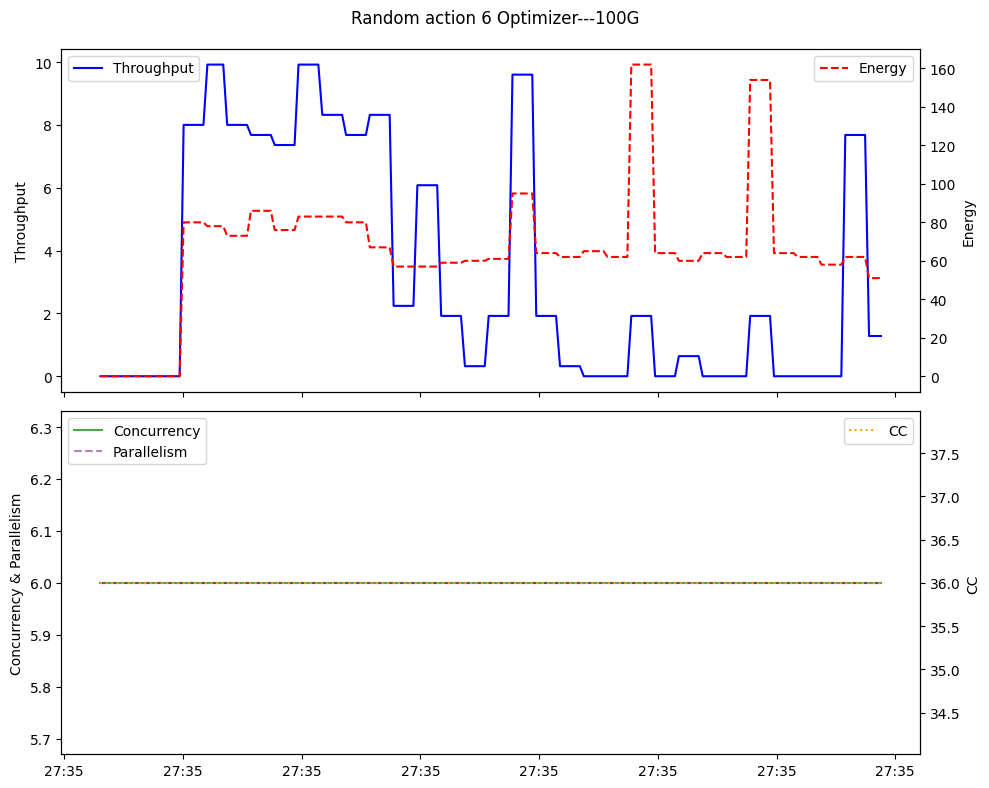

In [5]:
#Random action 6 100G

# Importing necessary libraries
import pandas as pd
import re
import datetime

FileName='/home/cc/transferService/final_code_transferService/logFileDir/10_25_2023_20_39_39.log'
# Read the log file
with open(FileName, "r") as f:
    logs = f.readlines()

# Parsing logs and creating a list of dictionaries
data = []

for log in logs:
    match = re.search(r"Throughput @([\d\.]+)s:\s+([\d\.]+)Gbps, lossRate: ([\d\.]+) CC:(\d+)  score:([\d\.-]+)  rtt:([\d\.]+) ms energy:([\d\.]+) Jules", log)
    if match:
        time, throughput, lossRate, cc, score, rtt, energy = match.groups()
        data.append({
            "Time": float(time),
            "Throughput": float(throughput),
            "Lossrate": float(lossRate),
            "CC": int(cc),
            "Score": float(score),
            "RTT": float(rtt),
            "Energy": float(energy)
        })

# Creating a dataframe
df = pd.DataFrame(data)
# df = df[df["Throughput"] != 0]

def map_cc_to_concurrency_parallelism(cc):
    # Using a dictionary to map CC values to concurrency and parallelism
    cc_map = {
        1: (1, 1),
        4: (2, 2),
        9: (3, 3),
        16: (4, 4),
        25: (5, 5),
        36: (6, 6),
        49: (7, 7),
        64: (8, 8)
    }
    return cc_map.get(cc, (0, 0))

df["concurrency"], df["parallelism"] = zip(*df["CC"].apply(map_cc_to_concurrency_parallelism))
# Convert Unix timestamp to datetime
df["Time"] = df["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# First subplot
ln1 = ax1.plot(df["Time"], df["Throughput"], label="Throughput", color="blue", linestyle="-")
ax1.set_ylabel("Throughput")
ax1_twin = ax1.twinx()
ln2 = ax1_twin.plot(df["Time"], df["Energy"], label="Energy", color="red", linestyle="--")
ax1_twin.set_ylabel("Energy")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Second subplot
ln3 = ax2.plot(df["Time"], df["concurrency"], label="Concurrency", color="green", linestyle="-", alpha=0.7)
ln4 = ax2.plot(df["Time"], df["parallelism"], label="Parallelism", color="purple", linestyle="--", alpha=0.5)
ax2.set_ylabel("Concurrency & Parallelism")
ax2_twin = ax2.twinx()
ln5 = ax2_twin.plot(df["Time"], df["CC"], label="CC", color="orange", linestyle=":")
ax2_twin.set_ylabel("CC")
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Formatting X axis to show only minutes and seconds
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.utcfromtimestamp(x).strftime('%M:%S')))

# Add label "Bayesian Optimizer"
fig.suptitle("Random action 6 Optimizer---100G")

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


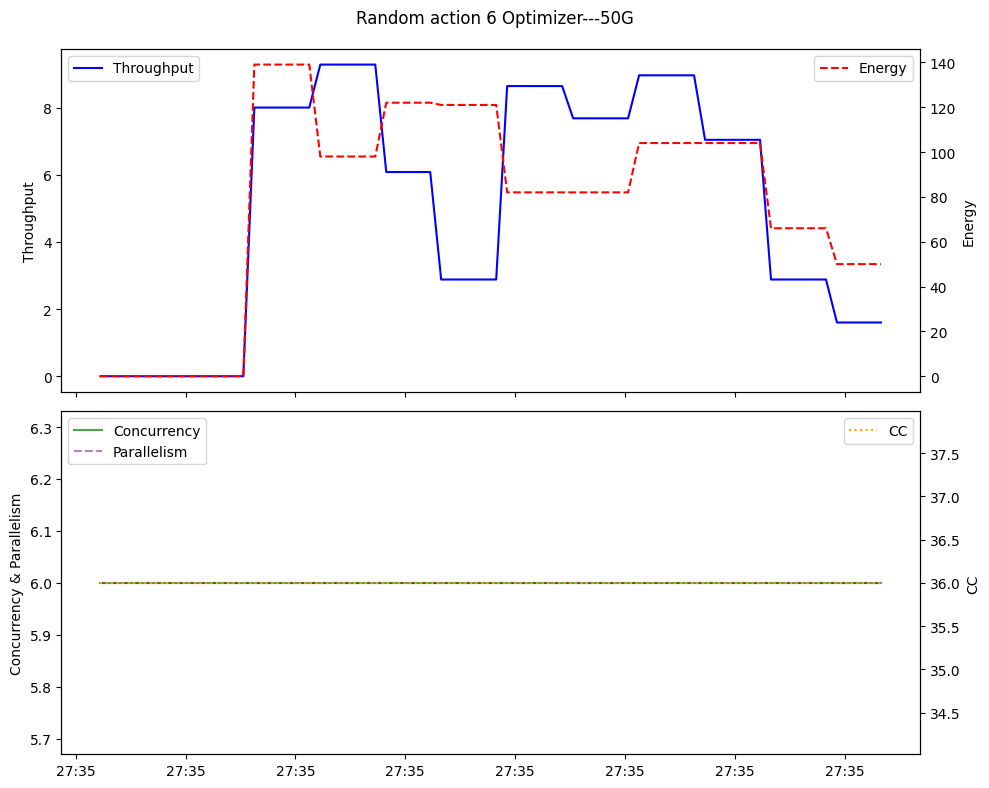

In [6]:
#Random action 6 50G

# Importing necessary libraries
import pandas as pd
import re
import datetime

FileName='/home/cc/transferService/final_code_transferService/logFileDir/10_25_2023_20_46_52.log'
# Read the log file
with open(FileName, "r") as f:
    logs = f.readlines()

# Parsing logs and creating a list of dictionaries
data = []

for log in logs:
    match = re.search(r"Throughput @([\d\.]+)s:\s+([\d\.]+)Gbps, lossRate: ([\d\.]+) CC:(\d+)  score:([\d\.-]+)  rtt:([\d\.]+) ms energy:([\d\.]+) Jules", log)
    if match:
        time, throughput, lossRate, cc, score, rtt, energy = match.groups()
        data.append({
            "Time": float(time),
            "Throughput": float(throughput),
            "Lossrate": float(lossRate),
            "CC": int(cc),
            "Score": float(score),
            "RTT": float(rtt),
            "Energy": float(energy)
        })

# Creating a dataframe
df = pd.DataFrame(data)
# df = df[df["Throughput"] != 0]

def map_cc_to_concurrency_parallelism(cc):
    # Using a dictionary to map CC values to concurrency and parallelism
    cc_map = {
        1: (1, 1),
        4: (2, 2),
        9: (3, 3),
        16: (4, 4),
        25: (5, 5),
        36: (6, 6),
        49: (7, 7),
        64: (8, 8)
    }
    return cc_map.get(cc, (0, 0))

df["concurrency"], df["parallelism"] = zip(*df["CC"].apply(map_cc_to_concurrency_parallelism))
# Convert Unix timestamp to datetime
df["Time"] = df["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# First subplot
ln1 = ax1.plot(df["Time"], df["Throughput"], label="Throughput", color="blue", linestyle="-")
ax1.set_ylabel("Throughput")
ax1_twin = ax1.twinx()
ln2 = ax1_twin.plot(df["Time"], df["Energy"], label="Energy", color="red", linestyle="--")
ax1_twin.set_ylabel("Energy")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Second subplot
ln3 = ax2.plot(df["Time"], df["concurrency"], label="Concurrency", color="green", linestyle="-", alpha=0.7)
ln4 = ax2.plot(df["Time"], df["parallelism"], label="Parallelism", color="purple", linestyle="--", alpha=0.5)
ax2.set_ylabel("Concurrency & Parallelism")
ax2_twin = ax2.twinx()
ln5 = ax2_twin.plot(df["Time"], df["CC"], label="CC", color="orange", linestyle=":")
ax2_twin.set_ylabel("CC")
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Formatting X axis to show only minutes and seconds
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.utcfromtimestamp(x).strftime('%M:%S')))

# Add label "Bayesian Optimizer"
fig.suptitle("Random action 6 Optimizer---50G")

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


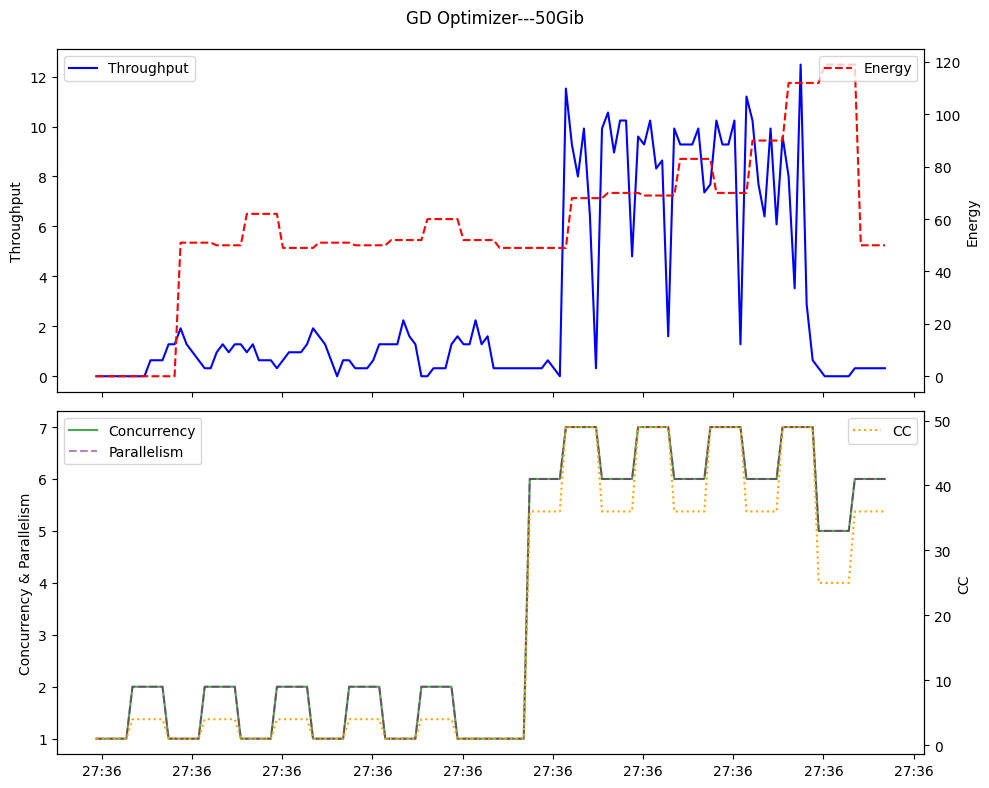

In [2]:
#GD throughput updated every one second --- 50*1GB

# Importing necessary libraries
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt


FileName='/home/cc/transferService/final_code_transferService/logFileDir/10_26_2023_00_57_29.log'
# Read the log file
with open(FileName, "r") as f:
    logs = f.readlines()

# Parsing logs and creating a list of dictionaries
data = []

for log in logs:
    match = re.search(r"Throughput @([\d\.]+)s:\s+([\d\.]+)Gbps, lossRate: ([\d\.]+) CC:(\d+)  score:([\d\.-]+)  rtt:([\d\.]+) ms energy:([\d\.]+) Jules", log)
    if match:
        time, throughput, lossRate, cc, score, rtt, energy = match.groups()
        data.append({
            "Time": float(time),
            "Throughput": float(throughput),
            "Lossrate": float(lossRate),
            "CC": int(cc),
            "Score": float(score),
            "RTT": float(rtt),
            "Energy": float(energy)
        })

# Creating a dataframe
df = pd.DataFrame(data)
# df = df[df["Throughput"] != 0]

def map_cc_to_concurrency_parallelism(cc):
    # Using a dictionary to map CC values to concurrency and parallelism
    cc_map = {
        1: (1, 1),
        4: (2, 2),
        9: (3, 3),
        16: (4, 4),
        25: (5, 5),
        36: (6, 6),
        49: (7, 7),
        64: (8, 8)
    }
    return cc_map.get(cc, (0, 0))

df["concurrency"], df["parallelism"] = zip(*df["CC"].apply(map_cc_to_concurrency_parallelism))
# Convert Unix timestamp to datetime
df["Time"] = df["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# First subplot
ln1 = ax1.plot(df["Time"], df["Throughput"], label="Throughput", color="blue", linestyle="-")
ax1.set_ylabel("Throughput")
ax1_twin = ax1.twinx()
ln2 = ax1_twin.plot(df["Time"], df["Energy"], label="Energy", color="red", linestyle="--")
ax1_twin.set_ylabel("Energy")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Second subplot
ln3 = ax2.plot(df["Time"], df["concurrency"], label="Concurrency", color="green", linestyle="-", alpha=0.7)
ln4 = ax2.plot(df["Time"], df["parallelism"], label="Parallelism", color="purple", linestyle="--", alpha=0.5)
ax2.set_ylabel("Concurrency & Parallelism")
ax2_twin = ax2.twinx()
ln5 = ax2_twin.plot(df["Time"], df["CC"], label="CC", color="orange", linestyle=":")
ax2_twin.set_ylabel("CC")
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Formatting X axis to show only minutes and seconds
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.utcfromtimestamp(x).strftime('%M:%S')))

# Add label "Bayesian Optimizer"
fig.suptitle("GD Optimizer---50Gib")

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


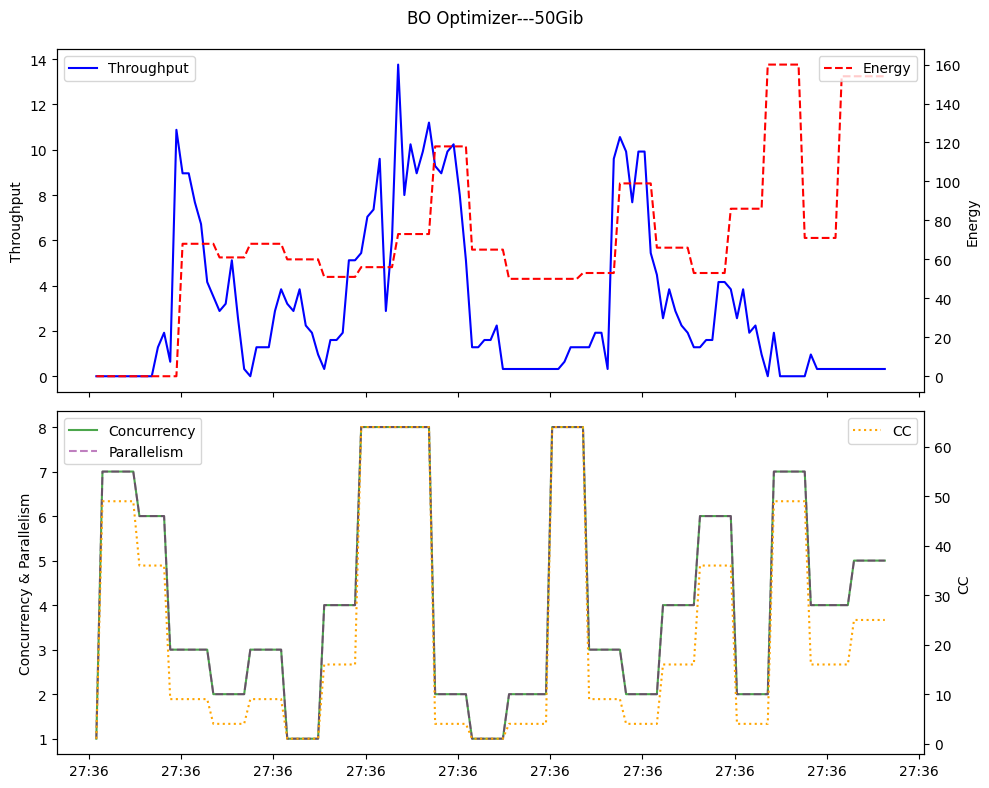

In [3]:
#BO throughput updated every one second --- 50*1GB

# Importing necessary libraries
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt


FileName='/home/cc/transferService/final_code_transferService/logFileDir/10_26_2023_01_02_16.log'
# Read the log file
with open(FileName, "r") as f:
    logs = f.readlines()

# Parsing logs and creating a list of dictionaries
data = []

for log in logs:
    match = re.search(r"Throughput @([\d\.]+)s:\s+([\d\.]+)Gbps, lossRate: ([\d\.]+) CC:(\d+)  score:([\d\.-]+)  rtt:([\d\.]+) ms energy:([\d\.]+) Jules", log)
    if match:
        time, throughput, lossRate, cc, score, rtt, energy = match.groups()
        data.append({
            "Time": float(time),
            "Throughput": float(throughput),
            "Lossrate": float(lossRate),
            "CC": int(cc),
            "Score": float(score),
            "RTT": float(rtt),
            "Energy": float(energy)
        })

# Creating a dataframe
df = pd.DataFrame(data)
# df = df[df["Throughput"] != 0]

def map_cc_to_concurrency_parallelism(cc):
    # Using a dictionary to map CC values to concurrency and parallelism
    cc_map = {
        1: (1, 1),
        4: (2, 2),
        9: (3, 3),
        16: (4, 4),
        25: (5, 5),
        36: (6, 6),
        49: (7, 7),
        64: (8, 8)
    }
    return cc_map.get(cc, (0, 0))

df["concurrency"], df["parallelism"] = zip(*df["CC"].apply(map_cc_to_concurrency_parallelism))
# Convert Unix timestamp to datetime
df["Time"] = df["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# First subplot
ln1 = ax1.plot(df["Time"], df["Throughput"], label="Throughput", color="blue", linestyle="-")
ax1.set_ylabel("Throughput")
ax1_twin = ax1.twinx()
ln2 = ax1_twin.plot(df["Time"], df["Energy"], label="Energy", color="red", linestyle="--")
ax1_twin.set_ylabel("Energy")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Second subplot
ln3 = ax2.plot(df["Time"], df["concurrency"], label="Concurrency", color="green", linestyle="-", alpha=0.7)
ln4 = ax2.plot(df["Time"], df["parallelism"], label="Parallelism", color="purple", linestyle="--", alpha=0.5)
ax2.set_ylabel("Concurrency & Parallelism")
ax2_twin = ax2.twinx()
ln5 = ax2_twin.plot(df["Time"], df["CC"], label="CC", color="orange", linestyle=":")
ax2_twin.set_ylabel("CC")
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Formatting X axis to show only minutes and seconds
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.utcfromtimestamp(x).strftime('%M:%S')))

# Add label "Bayesian Optimizer"
fig.suptitle("BO Optimizer---50Gib")

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


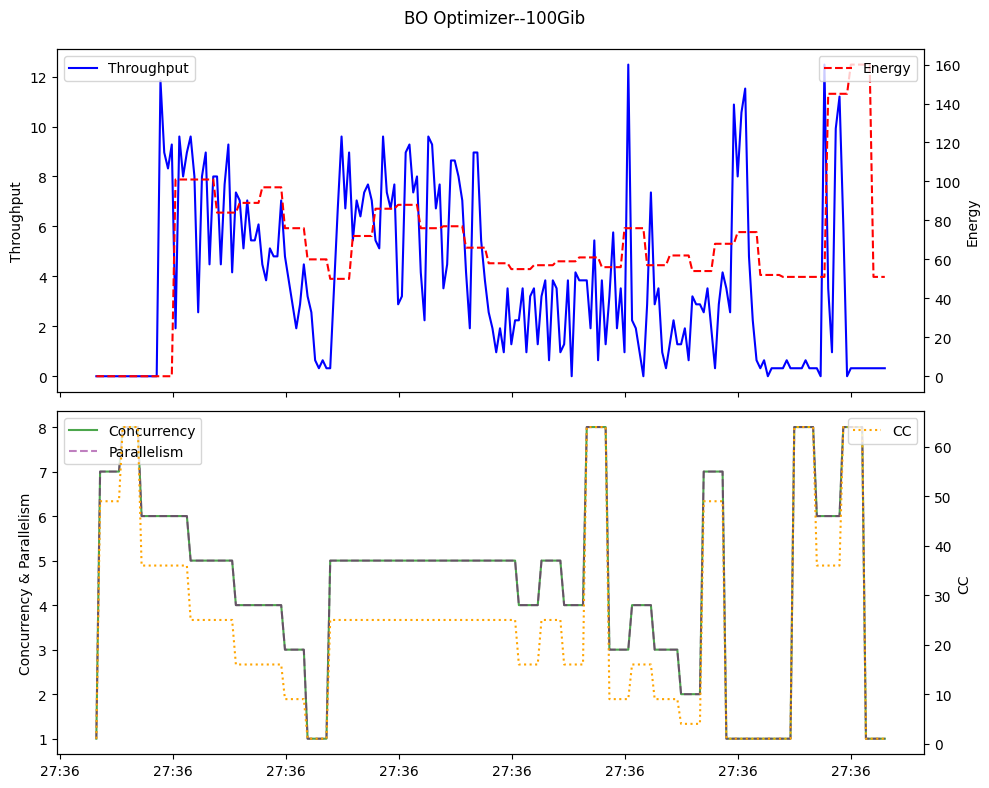

In [4]:
#BO throughput updated every one second --- 100*1GB

# Importing necessary libraries
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt


FileName='/home/cc/transferService/final_code_transferService/logFileDir/10_26_2023_01_09_09.log'
# Read the log file
with open(FileName, "r") as f:
    logs = f.readlines()

# Parsing logs and creating a list of dictionaries
data = []

for log in logs:
    match = re.search(r"Throughput @([\d\.]+)s:\s+([\d\.]+)Gbps, lossRate: ([\d\.]+) CC:(\d+)  score:([\d\.-]+)  rtt:([\d\.]+) ms energy:([\d\.]+) Jules", log)
    if match:
        time, throughput, lossRate, cc, score, rtt, energy = match.groups()
        data.append({
            "Time": float(time),
            "Throughput": float(throughput),
            "Lossrate": float(lossRate),
            "CC": int(cc),
            "Score": float(score),
            "RTT": float(rtt),
            "Energy": float(energy)
        })

# Creating a dataframe
df = pd.DataFrame(data)
# df = df[df["Throughput"] != 0]

def map_cc_to_concurrency_parallelism(cc):
    # Using a dictionary to map CC values to concurrency and parallelism
    cc_map = {
        1: (1, 1),
        4: (2, 2),
        9: (3, 3),
        16: (4, 4),
        25: (5, 5),
        36: (6, 6),
        49: (7, 7),
        64: (8, 8)
    }
    return cc_map.get(cc, (0, 0))

df["concurrency"], df["parallelism"] = zip(*df["CC"].apply(map_cc_to_concurrency_parallelism))
# Convert Unix timestamp to datetime
df["Time"] = df["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# First subplot
ln1 = ax1.plot(df["Time"], df["Throughput"], label="Throughput", color="blue", linestyle="-")
ax1.set_ylabel("Throughput")
ax1_twin = ax1.twinx()
ln2 = ax1_twin.plot(df["Time"], df["Energy"], label="Energy", color="red", linestyle="--")
ax1_twin.set_ylabel("Energy")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Second subplot
ln3 = ax2.plot(df["Time"], df["concurrency"], label="Concurrency", color="green", linestyle="-", alpha=0.7)
ln4 = ax2.plot(df["Time"], df["parallelism"], label="Parallelism", color="purple", linestyle="--", alpha=0.5)
ax2.set_ylabel("Concurrency & Parallelism")
ax2_twin = ax2.twinx()
ln5 = ax2_twin.plot(df["Time"], df["CC"], label="CC", color="orange", linestyle=":")
ax2_twin.set_ylabel("CC")
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Formatting X axis to show only minutes and seconds
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.utcfromtimestamp(x).strftime('%M:%S')))

# Add label "Bayesian Optimizer"
fig.suptitle("BO Optimizer--100Gib")

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


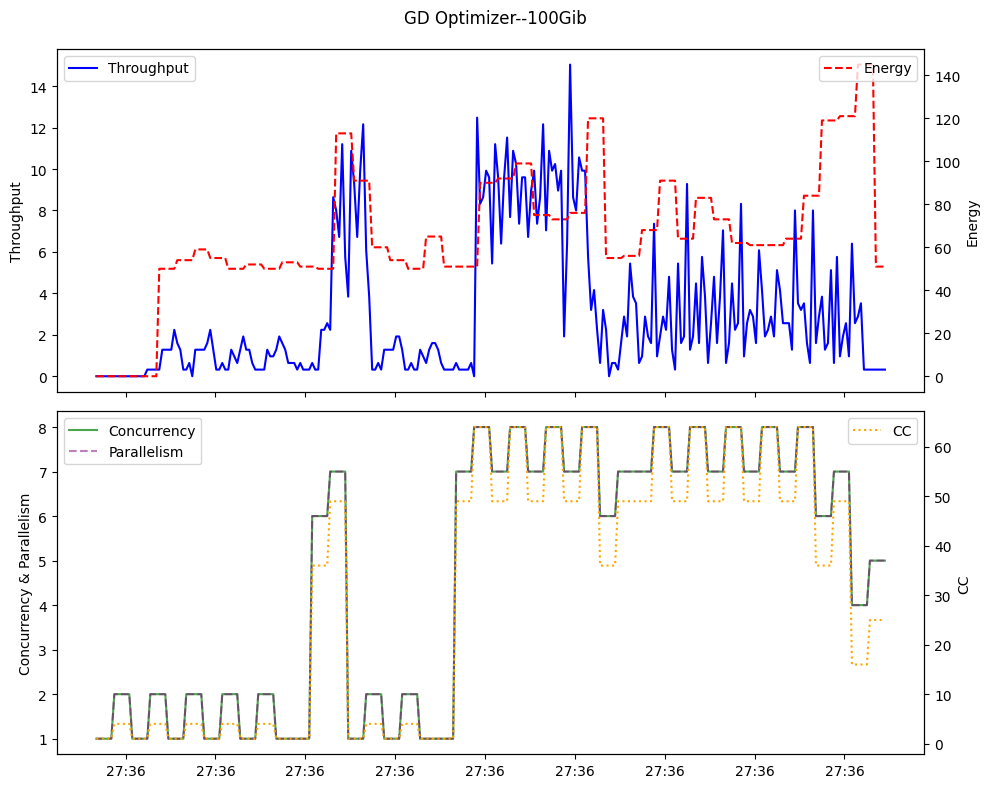

In [5]:
#GD throughput updated every one second --- 100*1GB

# Importing necessary libraries
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt


FileName='/home/cc/transferService/final_code_transferService/logFileDir/10_26_2023_01_13_20.log'
# Read the log file
with open(FileName, "r") as f:
    logs = f.readlines()

# Parsing logs and creating a list of dictionaries
data = []

for log in logs:
    match = re.search(r"Throughput @([\d\.]+)s:\s+([\d\.]+)Gbps, lossRate: ([\d\.]+) CC:(\d+)  score:([\d\.-]+)  rtt:([\d\.]+) ms energy:([\d\.]+) Jules", log)
    if match:
        time, throughput, lossRate, cc, score, rtt, energy = match.groups()
        data.append({
            "Time": float(time),
            "Throughput": float(throughput),
            "Lossrate": float(lossRate),
            "CC": int(cc),
            "Score": float(score),
            "RTT": float(rtt),
            "Energy": float(energy)
        })

# Creating a dataframe
df = pd.DataFrame(data)
# df = df[df["Throughput"] != 0]

def map_cc_to_concurrency_parallelism(cc):
    # Using a dictionary to map CC values to concurrency and parallelism
    cc_map = {
        1: (1, 1),
        4: (2, 2),
        9: (3, 3),
        16: (4, 4),
        25: (5, 5),
        36: (6, 6),
        49: (7, 7),
        64: (8, 8)
    }
    return cc_map.get(cc, (0, 0))

df["concurrency"], df["parallelism"] = zip(*df["CC"].apply(map_cc_to_concurrency_parallelism))
# Convert Unix timestamp to datetime
df["Time"] = df["Time"].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# First subplot
ln1 = ax1.plot(df["Time"], df["Throughput"], label="Throughput", color="blue", linestyle="-")
ax1.set_ylabel("Throughput")
ax1_twin = ax1.twinx()
ln2 = ax1_twin.plot(df["Time"], df["Energy"], label="Energy", color="red", linestyle="--")
ax1_twin.set_ylabel("Energy")
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Second subplot
ln3 = ax2.plot(df["Time"], df["concurrency"], label="Concurrency", color="green", linestyle="-", alpha=0.7)
ln4 = ax2.plot(df["Time"], df["parallelism"], label="Parallelism", color="purple", linestyle="--", alpha=0.5)
ax2.set_ylabel("Concurrency & Parallelism")
ax2_twin = ax2.twinx()
ln5 = ax2_twin.plot(df["Time"], df["CC"], label="CC", color="orange", linestyle=":")
ax2_twin.set_ylabel("CC")
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Formatting X axis to show only minutes and seconds
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: datetime.datetime.utcfromtimestamp(x).strftime('%M:%S')))

# Add label "Bayesian Optimizer"
fig.suptitle("GD Optimizer--100Gib")

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()
